# Sampling Statistics - Lab

## Introduction

Typically, we don't know statistics about a population itself. The only way to know these for sure is to survey the entirety of the population, which is typically impractical. For example, to know the true salary mean of individuals in the United States, we would have to survey each and every individual.

In lieu of being able to know the true underlying population statistics, we estimate them. Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. 

The average of a sample is known as the sample mean. Sampling distribution can be thought of as relative frequency distribution with a large number of samples. A relative frequency distribution tends to approach the sampling distribution as the number of samples increase.

## Objectives
You will be able to:

* Calculate and interpret sampling error
* Explain how sample size is related to sampling error
* Explain how the sampling error is related to population standard deviation

## Background and Terminologies 

In order to learn the **population mean**, we don't measure the whole population. Instead, we take a random sample and use **sample mean, ( x_bar or $\bar{x}$ )** to estimate the population mean **( mu or $\mu$ )**. The sample mean is usually not exactly the same as the population mean and depends upon the values of samples chosen, however, the population mean remains fixed. While using the **sample mean** to estimate the population mean, we come across the **sampling error**, which directly relates to the **standard deviation** of a sampling statistic (e.g. mean values). This difference can be caused by many factors including poor survey design, biased sampling methods, and the randomness inherent to drawing a sample from a population.

Let's learn about these concepts through an example.

>**Pumpkin Weights**

>The population is the weight of six pumpkins (in pounds) displayed in a carnival "Guess the Weight" game booth. You are asked to guess the average weight of the six pumpkins by picking two pumpkins at a time randomly until all pumpkins have been used.

| Pumpkin | Weight (in pounds) |
|---------|--------------------|
| A       |       19           |
| B       |       14           |
| C       |       15           |
| D       |       9            |
| E       |       10           |
| F       |       17           |

## Step 1

Let's calculate the population mean first, which we calculate as:

**$\large \mu = \frac{\text{sum of all elements}}{N}$**, where N is population size.

In [4]:
# Import necessary libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools

Create two lists, one with pumpkin names and one with the respective pumpkin weights. Combine the lists to create a pumpkin directory with the pumpkin names as keys and the pumpkin weights as values. 

In [5]:
# Create two lists with pumpkin names and weights

pumpkin = ['A', 'B', 'C', 'D','E', 'F' ]
weights = [19, 14, 15, 9, 10, 17]

# Combine both lists to create a dictionary

pumpkin_dict  = dict(zip(pumpkin, weights))

print (pumpkin_dict)

#{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


Now, let's try to calculate the mean of the pumpkin population and also visualize the weight distribution. 

In [6]:
# Calculate the population mean from pumpkin_dict

def calculate_mu(x):

    # Use the formula for mu given above
    d = sum(x.values()) / len(x)   

    return (d)   

mu = calculate_mu(pumpkin_dict)
mu

# 14.0

14.0

That was a pretty a straightforward exercise. Let's use the data we have so far to visualize the weights of individual pumpkins and mean weight. 

Text(0, 0.5, 'Weights')

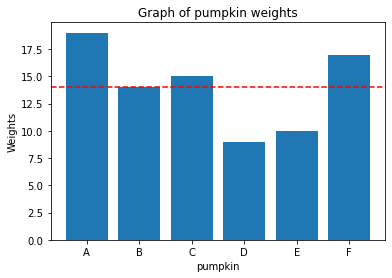

In [7]:
# Plot a bar graph showing weights of pumpkins and highlight the mean weight

plt.bar(pumpkin, weights)
plt.axhline(mu, linestyle = "--", color = "red")
plt.title("Graph of pumpkin weights")
plt.xlabel("pumpkin")
plt.ylabel("Weights")

We can see only one pumpkin has a weight which is equal to the mean weight (B:14). Let's try to simulate the random sampling process as stated below. 

## Step 2 : Calculate the mean of samples

From the `pumpkin_dict`, we can now obtain the sampling distributions of the sample mean for a given sample size. We'll do this while sampling *without* replacement (to reflect the idea that one can have two pumpkins at a given time, and will be taken out of population once used). 

Let's also try to make the code more flexible to allow sampling of any number of pumpkins from the population to study the effect of the sample size on the sample mean. 

To achieve this, first, we need to identify all the possible combinations that can be observed by choosing 2 pumpkins from the population, following the game rule.

In [8]:
# Identify a sample size n 
n = 2 

# Use itertools.combinations() to generate and print a list of combinations
combs = list(itertools.combinations(pumpkin, n))
print (combs)

# Using 2 samples, we can see 15 possible combinations as below:
# [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), 
#  ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), 
#  ('E', 'F')]


[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]


Great! We can now generate any number of combinations from the population (try changing the value of `n` above). The next step in the process is to calculate the mean of all possible combinations and study whether these means differ from the population mean, and whether sample size has any effect on estimating the population mean. 

Let's write a function that would include the code for generating combinations as above and also for identifying the mean for each sample. 

In [9]:

def sample_means(sample_size, data):

    """
    This function takes in population data as a dictionary along with a chosen sample size 
    to generate all possible combinations of given sample size. 
    The function calculates the mean of each sample and returns:
    a) a list of all combinations ( as tuples ) 
    b) a list of means for all sample
    """

    n = sample_size

    # Calculate the mean of population
    mu = np.mean(list(data.values()))
    #print ("Mean of population is:", mu)

    # Generate all possible combinations using given sample size
    combs = list(itertools.combinations(data.keys(), n))

    # Calculate the mean weight (x_bar) for all the combinations (samples) using the given data
    x_bar_list = []
    for comb in combs:
        sample_weights = [data[p] for p in comb]
        x_bar_list.append(np.mean(sample_weights))
    # Calculate sample mean for all combinations and append to x_bar_list
 

    return combs, x_bar_list

n = 2 #Sample size

combs, means = sample_means(n, pumpkin_dict)

# Print the sample combinations with their means

print(combs, means)

# Using 2 samples, we can see 15 possible combinations as below:
# The mean of all sample means mu_x_hat is: 14.0
# ('A', 'B') 16.5
# ('A', 'C') 17.0
# ('A', 'D') 14.0
# ('A', 'E') 14.5
# ('A', 'F') 18.0
# ('B', 'C') 14.5
# ('B', 'D') 11.5
# ('B', 'E') 12.0
# ('B', 'F') 15.5
# ('C', 'D') 12.0
# ('C', 'E') 12.5
# ('C', 'F') 16.0
# ('D', 'E') 9.5
# ('D', 'F') 13.0
# ('E', 'F') 13.5
# The mean of all sample means mu_x_hat is: 14.0

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')] [16.5, 17.0, 14.0, 14.5, 18.0, 14.5, 11.5, 12.0, 15.5, 12.0, 12.5, 16.0, 9.5, 13.0, 13.5]


Thus, even though each sample may give you an answer involving some error, the expected value is right at the target: exactly the population mean. In other words: 
>If one does the experiment over and over again, the overall average of the sample mean is exactly the population mean.

In the output above, we can see that some mean values i.e. 14.5, 12, are being repeated in the combinations. We can develop a frequency table to identify the probability of seeing a different mean value. 

In [10]:
def calculate_probability(means):
    '''
    Input: a list of means (x_hats)
    Output: a list of probablitity of each mean value
    '''
    #Calculate the frequency of each mean value
    freq = Counter(means)

    prob = []

    # Calculate and append frequency of each mean value in the prob list. 
    for m in means:
        prob.append(freq[m]/len(means))
    return prob

probs = calculate_probability(means)
for comb, m, p in zip(combs, means, probs): 
# Print combinations with sample means and probability of each mean value
    print(f"{comb} {m} {p}")

# ('A', 'B') 16.5 1/15
# ('A', 'C') 17.0 1/15
# ('A', 'D') 14.0 1/15
# ('A', 'E') 14.5 2/15
# ('A', 'F') 18.0 1/15
# ('B', 'C') 14.5 2/15
# ('B', 'D') 11.5 1/15
# ('B', 'E') 12.0 2/15
# ('B', 'F') 15.5 1/15
# ('C', 'D') 12.0 2/15
# ('C', 'E') 12.5 1/15
# ('C', 'F') 16.0 1/15
# ('D', 'E') 9.5 1/15
# ('D', 'F') 13.0 1/15
# ('E', 'F') 13.5 1/15


('A', 'B') 16.5 0.06666666666666667
('A', 'C') 17.0 0.06666666666666667
('A', 'D') 14.0 0.06666666666666667
('A', 'E') 14.5 0.13333333333333333
('A', 'F') 18.0 0.06666666666666667
('B', 'C') 14.5 0.13333333333333333
('B', 'D') 11.5 0.06666666666666667
('B', 'E') 12.0 0.13333333333333333
('B', 'F') 15.5 0.06666666666666667
('C', 'D') 12.0 0.13333333333333333
('C', 'E') 12.5 0.06666666666666667
('C', 'F') 16.0 0.06666666666666667
('D', 'E') 9.5 0.06666666666666667
('D', 'F') 13.0 0.06666666666666667
('E', 'F') 13.5 0.06666666666666667


Here, we see that the chance that the sample mean is exactly the population mean (i.e. 14) is only 1 in 15 (row 3), very small. It may also happen that the sample mean can never be the same value as the population mean. 

The difference between the sample mean and the population mean is known as the **Sampling Error**.  

>When using the sample mean to estimate the population mean, some possible error will be involved since random sample means are also random.

## Sample size and sampling error: 

Sample means cluster more closely around the population mean as the sample size increases. Thus, sampling error decreases as sample size increases.

Let's repeat the above exercise while increasing the sample size from 2 to 5. 

In [11]:
n = 5
combs, means = sample_means(n, pumpkin_dict)

# Print the sample combinations with their means
probs = calculate_probability(means)
for comb, m, p in zip(combs, means, probs): 
# Print combinations with sample means and probability of each mean value
    print(f"{comb} {m} {p}")

# Use above functions to generate combinations as samples with means and calculate the probability of seeing
# each mean value  with sample size = 5.

# Using 5 samples with a population of size, we can see 6 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0
# 1 ('A', 'B', 'C', 'D', 'E') 13.4 1/6
# 2 ('A', 'B', 'C', 'D', 'F') 14.8 1/6
# 3 ('A', 'B', 'C', 'E', 'F') 15.0 1/6
# 4 ('A', 'B', 'D', 'E', 'F') 13.8 1/6
# 5 ('A', 'C', 'D', 'E', 'F') 14.0 1/6
# 6 ('B', 'C', 'D', 'E', 'F') 13.0 1/6


('A', 'B', 'C', 'D', 'E') 13.4 0.16666666666666666
('A', 'B', 'C', 'D', 'F') 14.8 0.16666666666666666
('A', 'B', 'C', 'E', 'F') 15.0 0.16666666666666666
('A', 'B', 'D', 'E', 'F') 13.8 0.16666666666666666
('A', 'C', 'D', 'E', 'F') 14.0 0.16666666666666666
('B', 'C', 'D', 'E', 'F') 13.0 0.16666666666666666


Again, we see that using the sample mean to estimate the population mean involves sampling error. Sample means do not fully agree with the population mean. The mean of sample means, however, is still 14. 

In order to fully appreciate the impact of sample size on estimating the population mean, let's try to visualize sample means and how the spread of values change when changing sample size. 

In a loop, run the above experiment with sample sizes ranging from 1 to 5 and measure and visualize the spread of values around the population mean. 

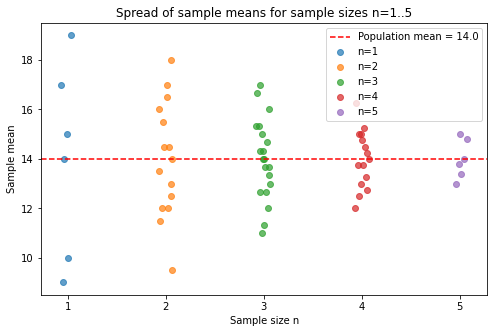

In [12]:
# Run a for loop to execute above code for sample size 1 to 5 and visualise the spread of sample 
for n in range(1, 6):
    combs, means = sample_means(n, pumpkin_dict)
pop_mean = np.mean(list(pumpkin_dict.values()))
plt.figure(figsize=(8, 5))
for n in range(1, 6):
    _, means = sample_means(n, pumpkin_dict)
    x = np.full_like(means, n, dtype=float)
    # jitter for visibility
    jitter = (np.random.rand(len(means)) - 0.5) * 0.15
    plt.scatter(x + jitter, means, alpha=0.7, label=f"n={n}")

plt.axhline(pop_mean, color='red', linestyle='--', label=f"Population mean = {pop_mean}")
plt.title("Spread of sample means for sample sizes n=1..5")
plt.xlabel("Sample size n")
plt.ylabel("Sample mean")
plt.xticks([1,2,3,4,5])
plt.legend()
# means



# Using 1 samples with a population of size, we can see 6 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 2 samples with a population of size, we can see 15 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 3 samples with a population of size, we can see 20 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 4 samples with a population of size, we can see 15 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

# Using 5 samples with a population of size, we can see 6 possible combinations 
# The mean of all sample means mu_x_hat is: 14.0

We can see that with increasing sample size, the **spread** of sample means is reduced and the sample mean values tend to come closer to the population mean.

## Step 3: Calculate the standard error

### So what is standard error?

The **_Standard Error (SE)_** is very similar to the standard deviation. Both are measures of spread. The higher the number, the more spread out your data is. To put it simply, the two terms are essentially equal — but there is one important difference. While the standard error uses statistics (sample data), standard deviations use parameters (population data). We achieve this by dividing the standard deviation by the square root of the sample size.

The calculation for the standard error of the sample mean is:

## $$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}}$$

Here, $\sigma$ is the population standard deviation (which we will approximate with the sample standard deviation $s$) and $n$ is the sample size.

Let's run the above block of code again and calculate the standard error according to the chosen sample size

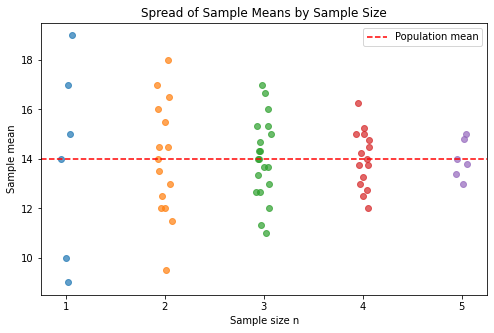

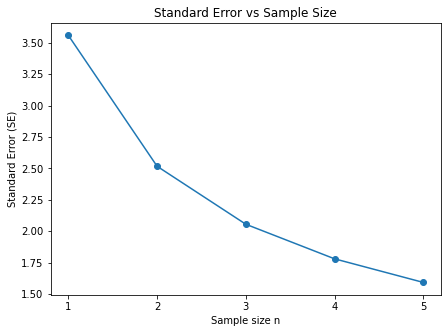

In [14]:
# Create empty lists for storing sample means, combinations and standard error for each iteration
means_list = []
combs_list = []
err_list = []
# Create a for loop with changing sample sizes
pop_std = np.std(list(pumpkin_dict.values()), ddof=0)
for n in range(1, 6):
    combs, means = sample_means(n, pumpkin_dict)
    # Calculate combinations, means as earlier, append to relevant lists
    means_list.append(means)
    combs_list.append(combs)

    # Calculate and append the standard error by dividing sample means with square root of sample size

    SE = pop_std / np.sqrt(n)
    err_list.append(SE)

    # Visualize sample spread and standard error values for each sample
    # --- Visualization 1: Spread of sample means ---
plt.figure(figsize=(8, 5))
for n, means in enumerate(means_list, start=1):
    x = np.full_like(means, n, dtype=float)
    jitter = (np.random.rand(len(means)) - 0.5) * 0.15
    plt.scatter(x + jitter, means, alpha=0.7)
    
plt.axhline(np.mean(list(pumpkin_dict.values())), color='red', linestyle='--', label="Population mean")
plt.title("Spread of Sample Means by Sample Size")
plt.xlabel("Sample size n")
plt.ylabel("Sample mean")
plt.xticks([1,2,3,4,5])
plt.legend()
plt.show()

# --- Visualization 2: Standard Error vs Sample Size ---
plt.figure(figsize=(7, 5))
plt.plot(range(1, 6), err_list, marker="o")
plt.title("Standard Error vs Sample Size")
plt.xlabel("Sample size n")
plt.ylabel("Standard Error (SE)")
plt.xticks([1,2,3,4,5])
plt.show()

Thus, even though each sample may give you an answer involving some error, the expected value is right at the target: exactly the population mean. In other words, if one does the experiment over and over again, the overall average of the sample mean is exactly the population mean. If the sample size is increased, the standard error is reduced. 

According to the **Central Limit Theorem**, for a large sample size, `x_hat` is approximately normally distributed, regardless of the distribution of the population one samples from.

## Summary

In this lab, we saw how sampling statistics relate to population statistics. In order to estimate a population parameter (i.e. mean) with a high level of accuracy, We must reduce the spread or the sample error which is simply the standard deviation of the samples from the sample mean. The size of samples must be set carefully in order to avoid excessive values for standard error to gain a high level of confidence in our population estimates. 